<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Caracteristicas_de_ondas_sinusoidales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARACTERÍSTICAS DE LAS ONDAS SINUSOIDALES

En ocasiones nos interesa obtener series temporales de ondas con características controladas para poder recrear ciertos fenómenos, como por ejemplo, para analizar el efecto que tiene aplicar un determinado filtro a una señal.

Como siempre, empezamos importando las librerías que vamos a utilizar.



In [50]:
import numpy as np
import matplotlib.pyplot as plt

Empezaremos con una onda simple con características sinusoidales.

Necesitamos crear una variable *x* con valores incrementales que simulará el transcurso del tiempo en segundos. Como ejemplo, esta variable va de 0 a 10 con incrementos de 0.01, como haría la variable tiempo de algún instrumento de medida biomecánica.

Después creamos otra variable *y* que se calcula a partir del seno de *x*, de modo que su valor oscilará entre -1 y 1 a medida que pasa el tiempo.

Después creamos una gráfica que represente la variable *x* en el eje horizontal y la variable *y* en el vertical. Con esto ya tenemos una variable que oscila a un ritmo constante.

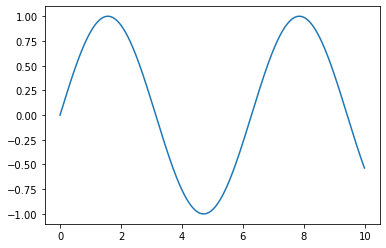

In [51]:
x=np.arange(0,10,0.01) #crea una serie temporal de 0 a 10 con incrementos de 0.01
y=np.sin(x) #calcula la variable y a partir del seno de la x

#Dibuja la gráfica
plt.plot(x,y)
plt.show()

Para tener un mayor control sobre la variable del tiempo, podemos definirla a partir de dos características: el periodo y la frecuencia de muestreo.

En situaciones reales, la frecuencia de muestreo la marca el instrumento de medida, y representa cuántas muestras captura por segundo, y se mide en hercios. Por ejemplo, una plataforma de fuerzas registra 1000 datos por segundo (1000 Hz), una cámara de vídeo registra 30 imágenes por segundo (30 Hz), etc.

In [52]:
duracion = 10 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

print(t)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


Ahora vamos a tomar control sobre las características de la onda.
Las ondas se pueden describir a partir de cuatro características:
1. Amplitud.
2. Frecuencia.
3. Ángulo de fase, o ángulo al inicio del ciclo de la onda.
4. Offset, o valor en torno al que oscila la onda (en la gráfica en el eje vertical).

En una sola ecuación podemos controlar todas estas características a la hora de crear la variable de la onda. Vamos a ir introduciéndolas por partes.


# Oscilador armónico simple

Así se llama una señal que oscila en el tiempo conforme a unos parámetros definidos. Vamos a ir controlándolos poco a poco.

## Control de la amplitud

En primer lugar, vamos a controlar la amplitud de la señal. En este caso lo guardamos en la variable *a*, y su valor representa la amplitud de la señal hacia el positivo y hacia el negativo. Es el radio de la circunferencia en torno al que giraría el objeto que estamos representando.

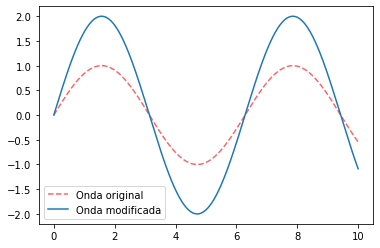

In [53]:
# =============================================================================
# %% Control sobre la amplitud
# =============================================================================
#calcula array tiempo
duracion = 10 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

onda_orig = np.array(np.sin(t))

a = 2 #radio del círculo o amplitud
onda = np.array(a * np.sin(t))

plt.plot(t, onda_orig, 'r--', alpha=0.6, label='Onda original')
plt.plot(t, onda, label='Onda modificada')

plt.legend()
plt.show()

En la siguiente celda puedes jugar con el radio moviendo el control deslizante para ver el efecto que tiene sobre la amplitud.

In [54]:
#@title (Interactivo) Efecto de la amplitud sobre la señal
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

x = np.arange(0, 10, 0.1)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-5, 5), plot_width=600, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var control = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = control * Math.sin(x[i])        
    }
    source.change.emit();
""")

slider = Slider(start=0.0, end=4.0, value=1, step=.1, title='Ajuste de la amplitud')
slider.js_on_change('value', callback)

layout = column(slider, plot)

output_file('Onda_amplitud.html', title='Control amplitud onda')

show(layout)

## Control de la frecuencia

También podemos controlar la frecuencia con la que oscila la señal. Esto representa cuántos ciclos completos realiza cada segundo. Para ello, hay que multiplicar la variable del tiempo por la frecuencia multiplicada por 2 por el número *PI*.

En el siguiente ejemplo, se muestra una señal que dura 1 s, con una frecuencia de 3 Hz, por eso se ven 3 oscilaciones en el segundo representado

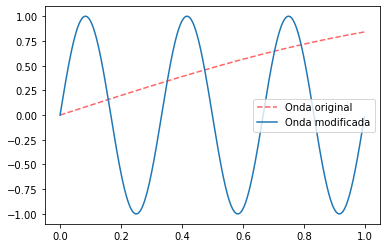

In [55]:
# =============================================================================
# %% Control sobre la frecuencia
# =============================================================================
#calcula array tiempo
duracion = 1 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

onda_orig = np.array(np.sin(t))

f = 3 #frecuencia de la señal
onda = np.array(np.sin(t * 2* np.pi*f))

plt.plot(t, onda_orig, 'r--', alpha=0.6, label='Onda original')
plt.plot(t, onda, label='Onda modificada')

plt.legend()
plt.show()

En la siguiente celda puedes jugar con el control deslizante, que controla la frecuencia de la señal.

In [56]:
#@title (Interactivo) Efecto de la frecuencia sobre la señal
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show

x = np.arange(0, 1, 0.001)
y = np.sin(x*2*np.pi*1)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-1.2, 1.2), plot_width=600, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var control = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.sin(x[i]*2*Math.PI*control)        
    }
    source.change.emit();
""")

slider = Slider(start=0.0, end=5.0, value=1, step=.05, title='Ajuste de la frecuencia')
slider.js_on_change('value', callback)

layout = column(slider, plot)

output_file('Onda_frecuencia.html', title='Control frecuencia onda')

show(layout)

## Control del ángulo de fase

Igualmente, podemos controlar en qué posición empieza a oscilar la señal.

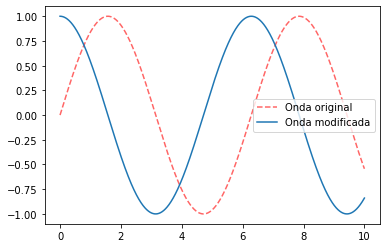

In [57]:
# =============================================================================
# %% Control sobre el ángulo de fase
# =============================================================================
#calcula array tiempo
duracion = 10 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

onda_orig = np.array(np.sin(t))

af = 90 #la señal inicia la oscilación en este ángulo. Aquí lo ponemos en grados, pero luego lo pasaremos a radianes
onda = np.array(np.sin(t + np.deg2rad(af)))

plt.plot(t, onda_orig, 'r--', alpha=0.6, label='Onda original')
plt.plot(t, onda, label='Onda modificada')

plt.legend()
plt.show()

In [58]:
#@title (Interactivo) Efecto del ángulo de fase sobre la señal
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

x = np.arange(0, 10, 0.001)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-3, 3), plot_width=600, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var control = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.sin(x[i] + control*Math.PI/180)        
    }
    source.change.emit();
""")

slider = Slider(start=0.0, end=360.0, value=0, step=1, title='Ajuste del ángulo de fase')
slider.js_on_change('value', callback)

layout = column(slider, plot)

output_file('Onda_ang_fase.html', title='Control ángulo de fase onda')

show(layout)

## Control del offset

Por último, se puede controlar el valor en torno al que oscila la señal, lo que se llama *offset*.

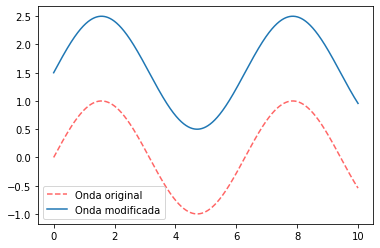

In [59]:
# =============================================================================
# %% Control sobre el offset
# =============================================================================
#calcula array tiempo
duracion = 10 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

onda_orig = np.array(np.sin(t))

offset = 1.5 #la señal va a oscilar alrededor de este valor
onda = np.array(offset + np.sin(t))

plt.plot(t, onda_orig, 'r--', alpha=0.6, label='Onda original')
plt.plot(t, onda, label='Onda modificada')

plt.legend()
plt.show()

In [60]:
#@title (Interactivo) Efecto del offset sobre la señal
import numpy as np

from bokeh.layouts import column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

x = np.arange(0, 10, 0.001)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-3, 3), plot_width=600, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var control = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = control + Math.sin(x[i])        
    }
    source.change.emit();
""")

slider = Slider(start=-2.0, end=2.0, value=0, step=.1, title='Ajuste del offset')
slider.js_on_change('value', callback)

layout = column(slider, plot)

output_file('Onda_offset.html', title='Control offset onda')

show(layout)

# Oscilador con control completo

Finalmente, podemos poner conjuntamente todas las variables que hemos ido probando por separado para controlar las características de la señal.

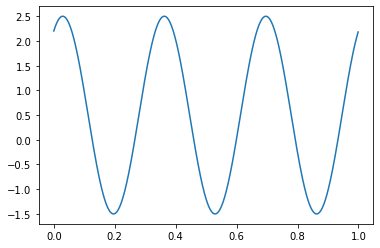

In [61]:
# =============================================================================
# %% Oscilador con control completo
# =============================================================================
#calcula array tiempo
duracion = 1. #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

#offset vertical
of = 0.5

#ampitud
a = 2

#frecuencia
f = 3

#ángulo de fase
af = 45

#Señal con todas las características integradas
onda = np.array(of + a * np.sin(2*np.pi * f * t + af))

plt.plot(t, onda,)
plt.show()

In [62]:
#@title (Interactivo) Efecto de todos los controles sobre la señal
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

x = np.arange(0, 10, 0.001)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-3, 3), plot_width=600, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0, end=4, value=1, step=.1, title='Amplitud')
frec_slider = Slider(start=0, end=5, value=1, step=.1, title='Frecuencia')
fase_slider = Slider(start=0, end=360, value=0, step=1, title='Ángulo de fase')
offset_slider = Slider(start=-3, end=3, value=0, step=.1, title='Offset')

callback = CustomJS(args=dict(source=source, amp=amp_slider, frec=frec_slider, fase=fase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const a = amp.value;
    const f = frec.value;
    const af = fase.value;
    const of = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = of + a * Math.sin(f * x[i] + af*Math.PI/180);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
frec_slider.js_on_change('value', callback)
fase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = column(amp_slider, frec_slider, fase_slider, offset_slider,
    plot)

output_file('Onda_completa.html', title='Control onda copleta')

show(layout)

Podemos crear varias ondas a la vez y meterlas en una misma variable controlando sus características de offset, amplitud, frecuencia y ángulo de fase, cada una en una lista. El resultado final es el siguiente:

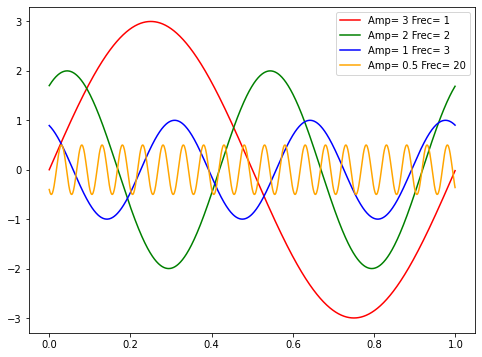

In [67]:
# =============================================================================
# %% Oscilador con control completo
# =============================================================================
#calcula array tiempo
duracion = 1. #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

col=['red','green','blue', 'orange']

#offset vertical
of=[0,0,0,0]

#ampitudes
a=[3,2,1,0.5]

#frecuencias
f=[1,2,3,20]

#ángulos de fase, ángulo al inicio del tiempo
af=[0,45,90,180]

#se pueden crear todas las ondas en una línea
ondas = np.array([of[i] + a[i]*np.sin(2*np.pi*f[i]*t + af[i]) for i in range(len(a))]).T

fig=plt.subplots(figsize=(8, 6))
for i in range(0, len(a)):
    plt.plot(t, ondas[:,i], '-', color= col[i], label='Amp= {0} Frec= {1}'.format(a[i], f[i]))    
plt.legend(loc='best')
plt.show()

# Oscilador armónico simple con velocidad

Otra forma de expresar el oscilador es apartir de la velocidad angular, que se calcula a partir de la frecuencia.

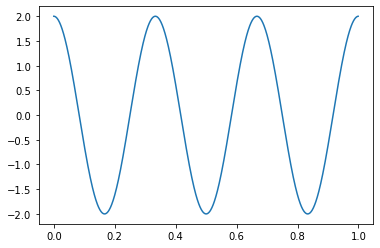

In [64]:
# =============================================================================
# %%Oscilador armónico simple con velocidad
# =============================================================================
#calcula array tiempo
duracion = 1 #duración del registro en segundos 
Fs = 1000 #frecuencia de muestreo en hercios
Ts = 1./Fs #intervalo de tiempo entre datos en segundos
t = np.arange(0, duracion, Ts)

a = 2  #amplitud
f = 3 #frecuencia
w = 2*np.pi*f #velocidad angular
af = np.deg2rad(90) #desfase, pasado de grados a radianes
of = 0 #offset
onda = np.array(of + a * np.sin(w * t + af))

plt.plot(t, onda)
plt.show()